In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [17]:
# Load the dataset
dataset = pd.read_csv('/Users/aumchampaneri/Downloads/tableConvert.com_brr1xf.csv', header=0)

# Preprocess the data
dataset['Brain Weight (grams)'] = dataset['Brain Weight (grams)'].replace({'0.428?': '0.428', '0.453?': '0.453'})
dataset['Mouse'] = dataset['Mouse'].replace({'wt01': '0001', 'wt02': '0002', 'wt03': '0003', 'wt04': '0004'}).astype(float)
dataset.set_index('Mouse', inplace=True)
# Replace "No Data" with empty strings in the specified columns
dataset['K_Perfusion Mean'] = dataset['K_Perfusion Mean'].replace('No Data', np.nan).astype(float)
dataset['B_Perfusion Mean'] = dataset['B_Perfusion Mean'].replace('No Data', np.nan).astype(float)


# Convert specified columns to float if they exist
columns_to_convert = [
    'Age (Days)', 'Body Weight (grams)', 'Kidney Weight L (grams)',
    'Kidney Weight R (grams)', 'Brain Weight (grams)', 'Glomeruli Count L',
    'Glomeruli Count R', 'Nephrons / Kidney-L (mg)', 'Nephrons / Kidney-R (mg)'
]
existing_columns_to_convert = [col for col in columns_to_convert if col in dataset.columns]
dataset[existing_columns_to_convert] = dataset[existing_columns_to_convert].astype(float)

# Convert 'Genotype' and 'Gender' columns to string if they exist
if 'Genotype' in dataset.columns:
    dataset['Genotype'] = dataset['Genotype'].astype(str)
if 'Gender' in dataset.columns:
    dataset['Gender'] = dataset['Gender'].astype(str)

# Convert 'Date of Birth' and 'Date of Sacrifice' columns to datetime if they exist
if 'Date of Birth' in dataset.columns:
    dataset['Date of Birth'] = pd.to_datetime(dataset['Date of Birth'])
if 'Date of Sacrifice' in dataset.columns:
    dataset['Date of Sacrifice'] = pd.to_datetime(dataset['Date of Sacrifice'])

# Remove rows with any NaN values
dataset.dropna(inplace=True)

# Optional: Verify the changes
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 2317.0 to 2599.0
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Genotype                   33 non-null     object        
 1   Gender                     33 non-null     object        
 2   Date of Birth              33 non-null     datetime64[ns]
 3   Date of Sacrifice          33 non-null     datetime64[ns]
 4   Age (Days)                 33 non-null     float64       
 5   Body Weight (grams)        33 non-null     float64       
 6   Kidney Weight L (grams)    33 non-null     float64       
 7   Kidney Weight R (grams)    33 non-null     float64       
 8   Brain Weight (grams)       33 non-null     float64       
 9   Glomeruli Count L          33 non-null     float64       
 10  Glomeruli Count R          33 non-null     float64       
 11  Nephrons / Kidney-L (mg)   33 non-null     float64       
 12  Nephro

/var/folders/dk/j41qmgy16b5_49s_wh137t_m0000gn/T/ipykernel_15663/3957119800.py:51: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(x='Genotype', y=column, data=dataset, join=False, color='red', markers='D', errorbar='sd')


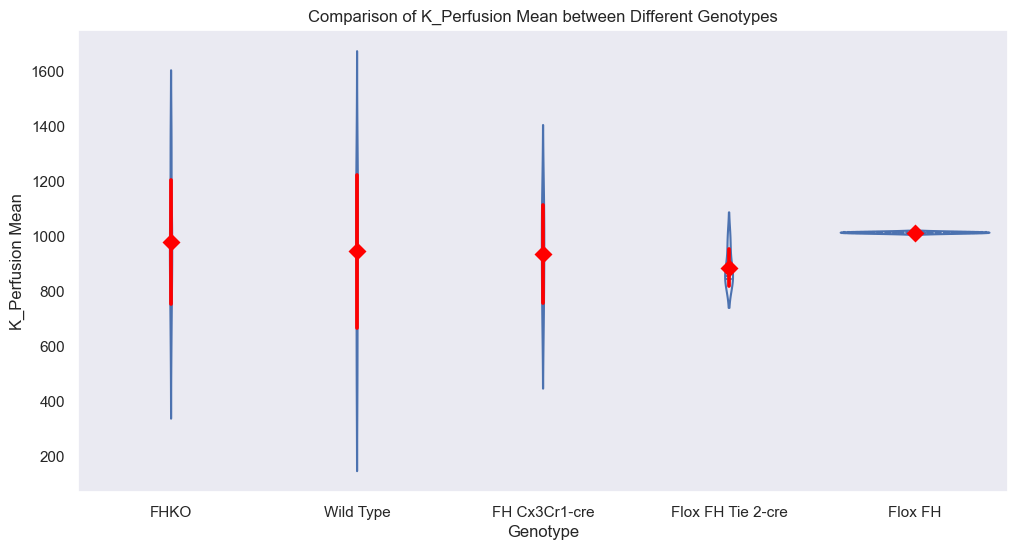

/var/folders/dk/j41qmgy16b5_49s_wh137t_m0000gn/T/ipykernel_15663/3957119800.py:51: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(x='Genotype', y=column, data=dataset, join=False, color='red', markers='D', errorbar='sd')


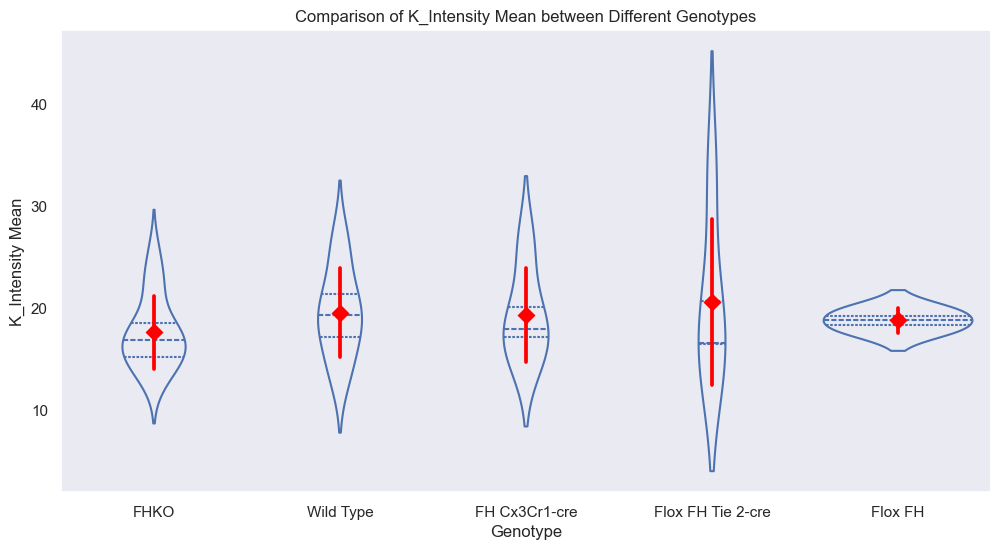

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
dataset = pd.read_csv('/Users/aumchampaneri/Downloads/tableConvert.com_brr1xf.csv', header=0)

# Preprocess the data
dataset['Brain Weight (grams)'] = dataset['Brain Weight (grams)'].replace({'0.428?': '0.428', '0.453?': '0.453'})
dataset['Mouse'] = dataset['Mouse'].replace({'wt01': '0001', 'wt02': '0002', 'wt03': '0003', 'wt04': '0004'}).astype(float)
dataset.set_index('Mouse', inplace=True)
dataset['K_Perfusion Mean'] = dataset['K_Perfusion Mean'].replace('No Data', np.nan).astype(float)
dataset['B_Perfusion Mean'] = dataset['B_Perfusion Mean'].replace('No Data', np.nan).astype(float)

# Convert specified columns to float if they exist
columns_to_convert = [
    'Age (Days)', 'Body Weight (grams)', 'Kidney Weight L (grams)',
    'Kidney Weight R (grams)', 'Brain Weight (grams)', 'Glomeruli Count L',
    'Glomeruli Count R', 'Nephrons / Kidney-L (mg)', 'Nephrons / Kidney-R (mg)'
]
existing_columns_to_convert = [col for col in columns_to_convert if col in dataset.columns]
dataset[existing_columns_to_convert] = dataset[existing_columns_to_convert].astype(float)

# Convert 'Genotype' and 'Gender' columns to string if they exist
if 'Genotype' in dataset.columns:
    dataset['Genotype'] = dataset['Genotype'].astype(str)
if 'Gender' in dataset.columns:
    dataset['Gender'] = dataset['Gender'].astype(str)

# Convert 'Date of Birth' and 'Date of Sacrifice' columns to datetime if they exist
if 'Date of Birth' in dataset.columns:
    dataset['Date of Birth'] = pd.to_datetime(dataset['Date of Birth'])
if 'Date of Sacrifice' in dataset.columns:
    dataset['Date of Sacrifice'] = pd.to_datetime(dataset['Date of Sacrifice'])

# Remove rows with any NaN values
dataset.dropna(inplace=True)

# Columns to compare
columns_of_interest = [
    'K_Perfusion Mean',
    'K_Intensity Mean',
]

# Create violin plots for each column
sns.set_theme(style="dark")
for column in columns_of_interest:
    plt.figure(figsize=(12, 6))
    sns.violinplot(x='Genotype', y=column, data=dataset, inner="quartile", fill=False)
    sns.pointplot(x='Genotype', y=column, data=dataset, join=False, color='red', markers='D', errorbar='sd')
    plt.xlabel('Genotype')
    plt.ylabel(column)
    plt.title(f'Comparison of {column} between Different Genotypes')
    plt.show()